<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/MissingImputation/BinaryVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen,Recent_Date,Recent_Creatinine,Recent_eGFR
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,215.0,81.0,123.0,99.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203,2565-11-03 09:37:44.910,0.73,79.14
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,219.0,64.0,146.0,73.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920,2565-11-03 09:37:44.910,0.73,79.14
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,193.0,62.0,129.0,65.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930,2565-11-03 09:37:44.910,0.73,79.14
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,205.0,69.0,139.0,76.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577,2565-11-03 09:37:44.910,0.73,79.14
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,198.0,74.0,129.0,60.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037,2565-11-03 09:37:44.910,0.73,79.14


In [3]:
data = pd.DataFrame(df)

**Check null columns and convert DataType**

In [4]:
columns_with_null = data.columns[data.isnull().any()].tolist()
print(columns_with_null)

['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L28:UrineProtein/Cr ratio']


In [5]:
data[columns_with_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BMI                        37281 non-null  float64
 1   BSA                        37271 non-null  float64
 2   Diastolic BP               45778 non-null  float64
 3   Systolic BP                45819 non-null  float64
 4   L1:eGFR                    52619 non-null  float64
 5   L2:BUN                     39780 non-null  float64
 6   L3:Creatinine              52619 non-null  float64
 7   L4:Sodium                  31337 non-null  float64
 8   L5:Potassium               33601 non-null  float64
 9   L6:Chloride                31256 non-null  float64
 10  L7:Bicarbonate             31416 non-null  float64
 11  L8:Uric                    13722 non-null  float64
 12  L9:Calcium                 12176 non-null  float64
 13  L10:Phosphorus             11841 non-null  flo




```
คอลัมน์ที่มีค่าว่าง 36 คอลัมน์
ไบนารี่ 36 คอลัมน์
ไม่มีค่าว่าง 83-26 = 57 คอลัมน์
สุดท้ายต้องมี 57+26+26 = 109 คอลัมน์
```



**Add One Binary Variable**

In [6]:
import numpy as np

for col in columns_with_null:
    data['new' + col] = np.where(data[col].isnull(), 1, 0)

In [7]:
# Select columns that start with 'new'
new_columns = [col for col in data.columns if col.startswith('new')]

# Select columns with null values and 'new' columns
selected_columns = columns_with_null + new_columns

In [8]:
data[selected_columns][['Systolic BP','newSystolic BP','Diastolic BP','newDiastolic BP','BMI','newBMI','BSA','newBSA']]

,Systolic BP,newSystolic BP,Diastolic BP,newDiastolic BP,BMI,newBMI,BSA,newBSA
0,127.0,0,75.0,0,20.80,0,1.39,0
1,105.0,0,64.0,0,20.27,0,1.38,0
2,138.0,0,76.0,0,20.72,0,1.38,0
3,134.0,0,66.0,0,20.27,0,1.36,0
4,103.0,0,57.0,0,19.05,0,1.33,0
...,...,...,...,...,...,...,...,...
52615,134.0,0,78.0,0,29.75,0,1.88,0
52616,127.0,0,57.0,0,25.97,0,1.63,0
52617,130.0,0,87.0,0,NaN,1,NaN,1
52618,137.0,0,83.0,0,NaN,1,NaN,1



```
* Mode = If the data type is 'object'.
* Mean = If the data type is numeric (not 'object') and dont have outlier
* Median = If the data type is numeric (not 'object') and have outlier

```



> **All column have oulier**



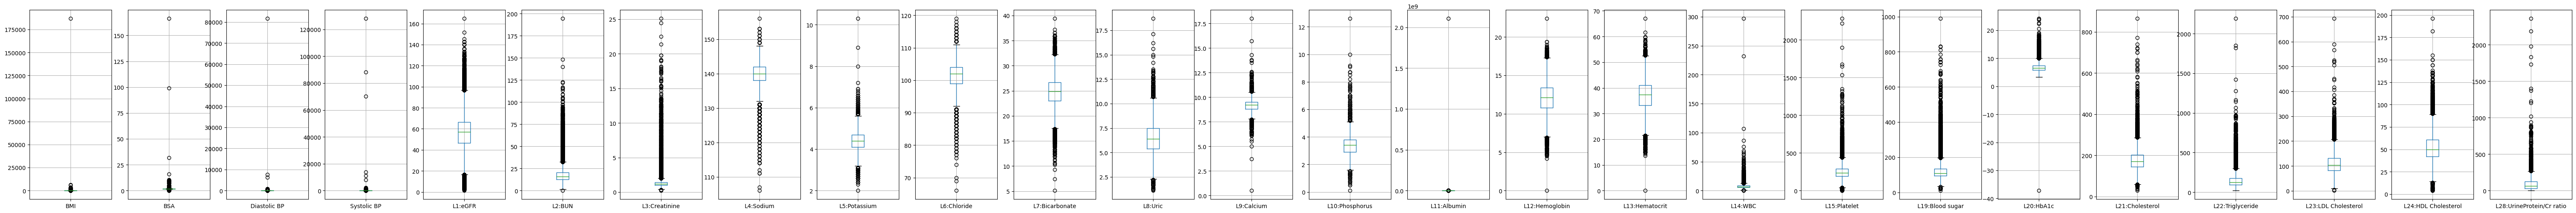

In [9]:
import matplotlib.pyplot as plt

# Create a subplot for each column with adjusted width
fig, axes = plt.subplots(nrows=1, ncols=len(columns_with_null), figsize=(80, 6))

for idx, column in enumerate(columns_with_null):
    data[[column]].boxplot(ax=axes[idx])
    #axes[idx].set_title(f'Boxplot of {column}')

plt.show()

In [10]:
# Function to identify columns with outliers
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in each column
for column in columns_with_null:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Column '{column}' has outliers.")
    else:
        print(f"Column '{column}' does not have outliers.")

Column 'BMI' has outliers.
Column 'BSA' has outliers.
Column 'Diastolic BP' has outliers.
Column 'Systolic BP' has outliers.
Column 'L1:eGFR' has outliers.
Column 'L2:BUN' has outliers.
Column 'L3:Creatinine' has outliers.
Column 'L4:Sodium' has outliers.
Column 'L5:Potassium' has outliers.
Column 'L6:Chloride' has outliers.
Column 'L7:Bicarbonate' has outliers.
Column 'L8:Uric' has outliers.
Column 'L9:Calcium' has outliers.
Column 'L10:Phosphorus' has outliers.
Column 'L11:Albumin' has outliers.
Column 'L12:Hemoglobin' has outliers.
Column 'L13:Hematocrit' has outliers.
Column 'L14:WBC' has outliers.
Column 'L15:Platelet' has outliers.
Column 'L19:Blood sugar' has outliers.
Column 'L20:HbA1c' has outliers.
Column 'L21:Cholesterol' has outliers.
Column 'L22:Triglyceride' has outliers.
Column 'L23:LDL Cholesterol' has outliers.
Column 'L24:HDL Cholesterol' has outliers.
Column 'L28:UrineProtein/Cr ratio' has outliers.


##**เติมด้วย median ของ แต่ละคน**

In [11]:
# Find columns with null values
columns_with_null = data.columns[data.isnull().any()].tolist()

# Fill null values with column median using apply and lambda function
data[columns_with_null] = data[columns_with_null].apply(lambda x: x.fillna(x.median()))

# Median imputation function
def median_impute(series):
    return series.fillna(series.median())

# Apply median imputation using groupby
data[columns_with_null] = data.groupby('PatientUID')[columns_with_null].transform(median_impute)

##**มีค่าว่างเกิดจาก median ของคนนั้นเป็น NaN เติมด้วย median ของทุกคน**

In [12]:
# Function to fill missing values based on the specified method
def fill_missing_values(data, column, method):
    if method == 'mean':
        data[column].fillna(data[column].mean(), inplace=True)
    elif method == 'median':
        data[column].fillna(data[column].median(), inplace=True)
    elif method == 'mode':
        data[column].fillna(data[column].mode()[0], inplace=True)

# Check for outliers in each column and fill missing values accordingly
for column in columns_with_null:
    outliers = detect_outliers(data, column)
    if data[column].dtype == 'O':
        fill_missing_values(data, column, 'mode')
        print(f"Column '{column}' was filled with 'mode'.")
    elif outliers.empty:
        fill_missing_values(data, column, 'mean')
        print(f"Column '{column}' was filled with 'mean'.")
    else:
        fill_missing_values(data, column, 'median')
        print(f"Column '{column}' was filled with 'median'.")

Column 'BMI' was filled with 'median'.
Column 'BSA' was filled with 'median'.
Column 'Diastolic BP' was filled with 'median'.
Column 'Systolic BP' was filled with 'median'.
Column 'L1:eGFR' was filled with 'median'.
Column 'L2:BUN' was filled with 'median'.
Column 'L3:Creatinine' was filled with 'median'.
Column 'L4:Sodium' was filled with 'median'.
Column 'L5:Potassium' was filled with 'median'.
Column 'L6:Chloride' was filled with 'median'.
Column 'L7:Bicarbonate' was filled with 'median'.
Column 'L8:Uric' was filled with 'median'.
Column 'L9:Calcium' was filled with 'median'.
Column 'L10:Phosphorus' was filled with 'median'.
Column 'L11:Albumin' was filled with 'median'.
Column 'L12:Hemoglobin' was filled with 'median'.
Column 'L13:Hematocrit' was filled with 'median'.
Column 'L14:WBC' was filled with 'median'.
Column 'L15:Platelet' was filled with 'median'.
Column 'L19:Blood sugar' was filled with 'median'.
Column 'L20:HbA1c' was filled with 'median'.
Column 'L21:Cholesterol' was f

In [13]:
# Select columns that start with 'new'
columns_with_new = [col for col in data.columns if col.startswith('new')]

# Select columns with null values
columns_with_null = data.columns[data.isnull().any()]

# Merge the selected columns
merged_data = pd.concat([data[columns_with_new], data[columns_with_null]], axis=1)
merged_data.head()

,newBMI,newBSA,newDiastolic BP,newSystolic BP,newL1:eGFR,newL2:BUN,newL3:Creatinine,newL4:Sodium,newL5:Potassium,newL6:Chloride,...,newL13:Hematocrit,newL14:WBC,newL15:Platelet,newL19:Blood sugar,newL20:HbA1c,newL21:Cholesterol,newL22:Triglyceride,newL23:LDL Cholesterol,newL24:HDL Cholesterol,newL28:UrineProtein/Cr ratio
0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,1,1,...,1,1,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,1,...,1,1,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
columns_with_new = [col for col in data.columns if col.startswith('new')]

# Select columns with null values
columns_with_null = data.columns[data.isnull().any()]


In [15]:
binary_columns = [col for col in data.columns if col.startswith('new')]
#data.drop(binary_columns, axis=1, inplace=True)

In [16]:
data.isnull().sum()

PatientUID                      0
PatientVisitUID                 0
Slopes                          0
G1M2:ARB                        0
G3M1:Statin                     0
                               ..
newL21:Cholesterol              0
newL22:Triglyceride             0
newL23:LDL Cholesterol          0
newL24:HDL Cholesterol          0
newL28:UrineProtein/Cr ratio    0
Length: 109, dtype: int64

In [17]:
data

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL13:Hematocrit,newL14:WBC,newL15:Platelet,newL19:Blood sugar,newL20:HbA1c,newL21:Cholesterol,newL22:Triglyceride,newL23:LDL Cholesterol,newL24:HDL Cholesterol,newL28:UrineProtein/Cr ratio
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,1
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,0,1,0,0,0,0,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [18]:
columns_with_null  = data.isnull().any()
if columns_with_null.any():
    print("There are columns with null values.")
else:
    print("No columns have null values.")


No columns have null values.


In [19]:
data.to_excel('BinaryFlag.xlsx')